### $\textbf{Entanglement and violation of the CHSC Bell's inequality}$

### $\textbf{Author:}$ $\text{Edy Alberto Flores Leal}$

---
---

### $\text{1. Theory}$

We recall that the Bell states $| \Phi^{\pm} \rangle$ are given by
$$
\begin{align*}
| \Phi^{+} \rangle &= \dfrac{1}{\sqrt{2}} ( | \mathrm{H} \rangle_{1} | \mathrm{H} \rangle_{2} + | \mathrm{V} \rangle_{1} | \mathrm{V} \rangle_{2} ), \\
| \Phi^{-} \rangle &= \dfrac{1}{\sqrt{2}} ( | \mathrm{H} \rangle_{1} | \mathrm{H} \rangle_{2} - | \mathrm{V} \rangle_{1} | \mathrm{V} \rangle_{2} ).
\end{align*}
$$

Maximum coincidence count rates are observed for the polarizer combinations $\alpha = \beta = 0^{\circ}$ and $\alpha = \beta = 90^{\circ}$, where $0^{\circ}$ corresponds to the horizontal ($\mathrm{H}$) state, and $90^{\circ}$ corresponds to the vertical ($\mathrm{V}$) state. In the diagonal basis, $45^{\circ}$ represents the diagonal ($\mathrm{D}$) state, while $-45^{\circ}$ represents the anti-diagonal ($\mathrm{A}$) state. The Bell state in the diagonal basis are given by
$$
\begin{align*}
| \Phi^{+} \rangle &= \dfrac{1}{\sqrt{2}} ( | \mathrm{D} \rangle_{1} | \mathrm{D} \rangle_{2} + | \mathrm{A} \rangle_{1} | \mathrm{A} \rangle_{2} ), \\
| \Phi^{-} \rangle &= \dfrac{1}{\sqrt{2}} ( | \mathrm{D} \rangle_{1} | \mathrm{D} \rangle_{2} - | \mathrm{A} \rangle_{1} | \mathrm{A} \rangle_{2} ).
\end{align*}
$$

To distinguish with Bell state was produced, we recall the following:
- $| \Phi^{+} \rangle$ has its maximum in the polarization settings $\alpha = \beta = +45^{\circ}$.
- $| \Phi^{-} \rangle$ has its maximum in the polarization settings $\alpha = \pm 45^{\circ}$ and $\beta = \mp 45^{\circ}$.

We also recall that the visibility is defined by
$$
V = \dfrac{C_{\parallel} - C_{\perp}}{C_{\parallel} + C_{\perp}},
$$

where
$$
\begin{align*}
C_{\parallel} &= C_{\mathrm{HH}} + C_{\mathrm{VV}}, \\
%
    C_{\perp} &= C_{\mathrm{HV}} + C_{\mathrm{VH}}.
\end{align*}
$$

To estimate the error $\Delta V$, we used the Gaussian error propagation rule given by
$$
\Delta V = \sqrt{ \left( \dfrac{\partial V}{\partial C_{\parallel}} \Delta C_{\parallel} \right)^2 + \left( \dfrac{\partial V}{\partial C_{\perp}} \Delta C_{\perp} \right)^2 },
$$

where $\Delta C_{\parallel} = \sqrt{C_{\parallel}}$ and $\Delta C_{\perp} = \sqrt{C_{\perp}}$, and
$$
\begin{align*}
\dfrac{\partial V}{C_{\parallel}} &= \dfrac{2 C_{\perp}}{(C_{\parallel} + C_{\perp})^2}, \\
%
\dfrac{\partial V}{C_{\perp}} &= -\dfrac{2 C_{\parallel}}{(C_{\parallel} + C_{\perp})^2}.
\end{align*}
$$

Using these parameters, we can determine the experimental visibility $V_{\mathrm{basis}}^{\mathrm{exp}} = V_{\mathrm{basis}} \pm \Delta V_{\mathrm{basis}}$ in the $\mathrm{HV}$ and $\mathrm{DA}$ bases.

### $\text{2. Code}$

In [1]:
# Libraries
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Plot parameters
plt.rcParams.update({
    'lines.linewidth': 2,               # linewidth
    'font.family': 'Helvetica Neue',    # font
    'mathtext.fontset': 'cm',           # math font
    'mathtext.default': 'it',           # math font style
    'font.size': 24,                    # font size
    'axes.titlesize': 26,               # title size
    'axes.grid': True,                  # grid
    'grid.linestyle': '-.',             # grid style
    'axes.facecolor': '#ECECEC',        # background color for the axes
    'figure.facecolor': '#FFFFFF',      # background color for the axes
    'legend.facecolor': '#FFFFFF'       # background color for the legend
})

### $\text{Visibility with no Half-Wave Plate}$

In [2]:
#   1 HORIZONTAL BASIS
# 1.1 Experimental measurements
C_hh_nhwp = 3271
C_hv_nhwp = 31
C_vh_nhwp = 20
C_vv_nhwp = 5

# 1.2 Parallel and perpendicular coincidences
C_hv_par_nhwp = C_hh_nhwp + C_vv_nhwp
C_hv_per_nhwp = C_hv_nhwp + C_vh_nhwp

# 1.3 Visibility in the HV basis
vis_hv_nhwp = (C_hv_par_nhwp - C_hv_per_nhwp) / (C_hv_par_nhwp + C_hv_per_nhwp)

# 1.4 Delta C_extrema in the HV basis
Delta_Chv_par_nhwp = C_hv_par_nhwp ** (1 / 2)
Delta_Chv_per_nhwp = C_hv_per_nhwp ** (1 / 2)

# 1.5 Partial derivatives in the HV basis
Partial_Chv_par_nhwp =  (2 * C_hv_per_nhwp) / (C_hv_par_nhwp + C_hv_per_nhwp) ** 2
Partial_Chv_per_nhwp = -(2 * C_hv_par_nhwp) / (C_hv_par_nhwp + C_hv_per_nhwp) ** 2

# 1.6 Visibility error in the HV basis
Vhv_nhwp_error = ((Partial_Chv_par_nhwp * Delta_Chv_par_nhwp) ** 2 
               +  (Partial_Chv_per_nhwp * Delta_Chv_per_nhwp) ** 2) ** (1 / 2)

# ===========================================================================================

#   2 DIAGONAL BASIS
# 2.1 Experimental measurements
C_dd_nhwp = 850
C_da_nhwp = 504
C_ad_nhwp = 710
C_aa_nhwp = 480

# 2.1 Parallel and perpendicular coincidences
C_da_par_nhwp = C_dd_nhwp + C_aa_nhwp
C_da_per_nhwp = C_da_nhwp + C_ad_nhwp

# 2.3 Visibility in the DA basis
vis_da_nhwp = (C_da_par_nhwp - C_da_per_nhwp) / (C_da_par_nhwp + C_da_per_nhwp)

# 2.4 Delta C_extrema in the DA basis
Delta_Cda_par_nhwp = C_da_par_nhwp ** (1 / 2)
Delta_Cda_per_nhwp = C_da_per_nhwp ** (1 / 2)

# 2.5 Partial derivatives in the DA basis
Partial_Cda_par_nhwp =  (2 * C_da_per_nhwp) / (C_da_par_nhwp + C_da_per_nhwp) ** 2
Partial_Cda_per_nhwp = -(2 * C_da_par_nhwp) / (C_da_par_nhwp + C_da_per_nhwp) ** 2

# 2.6 Visibility error in the DA basis
Vda_nhwp_error = ((Partial_Cda_par_nhwp * Delta_Cda_par_nhwp) ** 2 
               +  (Partial_Cda_per_nhwp * Delta_Cda_per_nhwp) ** 2) ** (1 / 2)

# Results
print(f"Visibility in the HV basis with no HWP: {vis_hv_nhwp * 100:.2f} ± {Vhv_nhwp_error * 100:.2f}%")
print(f"Visibility in the DA basis with no HWP: {vis_da_nhwp * 100:.2f} ± {Vda_nhwp_error * 100:.2f}%")

Visibility in the HV basis with no HWP: 96.93 ± 0.43%
Visibility in the DA basis with no HWP: 4.56 ± 1.98%


In [3]:
# Open data frame
data_nhwp = pd.read_csv('./fixed_nhwp.csv')

# Retrieve of the data
alpha_nhwp = data_nhwp['angle'].values
counts_nhwp = data_nhwp['coincidence_rate'].values

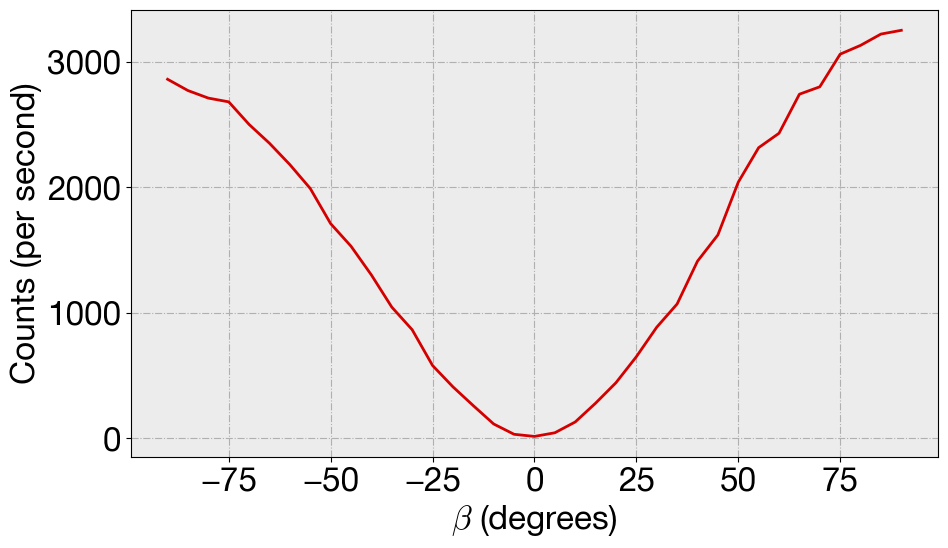

In [4]:
# Figure size
plt.figure(figsize = (10, 6))

# Figure title and legends
# plt.title(r'Coincidence counts against polarization ($\alpha = 90^{\circ}$) without a HWP', wrap = True)
plt.xlabel(r'$\beta$ (degrees)')
plt.ylabel(r'Counts (per second)')

# Plot
plt.plot(alpha_nhwp, counts_nhwp, color = '#D40000')

# Final figure parameters
plt.tight_layout()
plt.savefig('./coincidence_fixed_no-hwp.pdf')

### $\text{Visibility with HWP}$

In [5]:
#   3 HORIZONTAL BASIS
# 3.1 Experimental measurements
C_hh_hwp = 415
C_hv_hwp = 12
C_vh_hwp = 24
C_vv_hwp = 190

# 3.2 Parallel and perpendicular coincidences
C_hv_par_hwp = C_hh_hwp + C_vv_hwp
C_hv_per_hwp = C_hv_hwp + C_vh_hwp

# 3.3 Visibility in the HV basis
vis_hv_hwp = (C_hv_par_hwp - C_hv_per_hwp) / (C_hv_par_hwp + C_hv_per_hwp)

# 3.4  Delta C in the HV basis
Delta_Chv_par_hwp = C_hv_par_hwp ** (1 / 2)
Delta_Chv_per_hwp = C_hv_per_hwp ** (1 / 2)

# 3.5 Partial derivatives in the HV basis
Partial_Chv_par_hwp =  (2 * C_hv_per_hwp) / (C_hv_par_hwp + C_hv_per_hwp) ** 2
Partial_Chv_per_hwp = -(2 * C_hv_par_hwp) / (C_hv_par_hwp + C_hv_per_hwp) ** 2

# 3.6 Visibility error in the HV basis
Vhv_hwp_error = ((Partial_Chv_par_hwp * Delta_Chv_par_hwp) ** 2 
              +  (Partial_Chv_per_hwp * Delta_Chv_per_hwp) ** 2) ** (1 / 2)

# ===========================================================================================

#   4 DIAGONAL BASIS
# 4.1 Experimental measurements
C_dd_hwp = 50
C_da_hwp = 140
C_ad_hwp = 270
C_aa_hwp = 37

# 4.2 Parallel and perpendicular coincidences
C_da_par_hwp = C_dd_hwp + C_aa_hwp
C_da_per_hwp = C_da_hwp + C_ad_hwp

# 4.3 Visibility
vis_da_hwp = (C_da_par_hwp - C_da_per_hwp) / (C_da_par_hwp + C_da_per_hwp)

# 4.4 Delta C_extrema in the DA basis
Delta_Cda_par_hwp = C_da_par_hwp ** (1 / 2)
Delta_Cda_per_hwp = C_da_per_hwp ** (1 / 2)

# 4.5 Partial derivatives in the DA basis
Partial_Cda_par_hwp =  (2 * C_da_per_hwp) / (C_da_par_hwp + C_da_per_hwp) ** 2
Partial_Cda_per_hwp = -(2 * C_da_par_hwp) / (C_da_par_hwp + C_da_per_hwp) ** 2

# 2.6 Visibility error in the DA basis
Vda_hwp_error = ((Partial_Cda_par_hwp * Delta_Cda_par_hwp) ** 2 
              +  (Partial_Cda_per_hwp * Delta_Cda_per_hwp) ** 2) ** (1 / 2)

# Results
print(f"Visibility in the HV basis with HWP: {vis_hv_hwp * 100:.2f} ± {Vhv_hwp_error * 100:.2f}%")
print(f"Visibility in the DA basis with HWP: {vis_da_hwp * 100:.2f} ± {Vda_hwp_error * 100:.2f}%")

Visibility in the HV basis with HWP: 88.77 ± 1.82%
Visibility in the DA basis with HWP: -64.99 ± 3.41%


In [6]:
# Open data frame
data_180 = pd.read_csv('./fixed_180.csv')

# Retrieve of the data
alpha_180 = data_180['angle'].values
counts_180 = data_180['coincidence_rate'].values
single_180 = data_180['single_1'].values

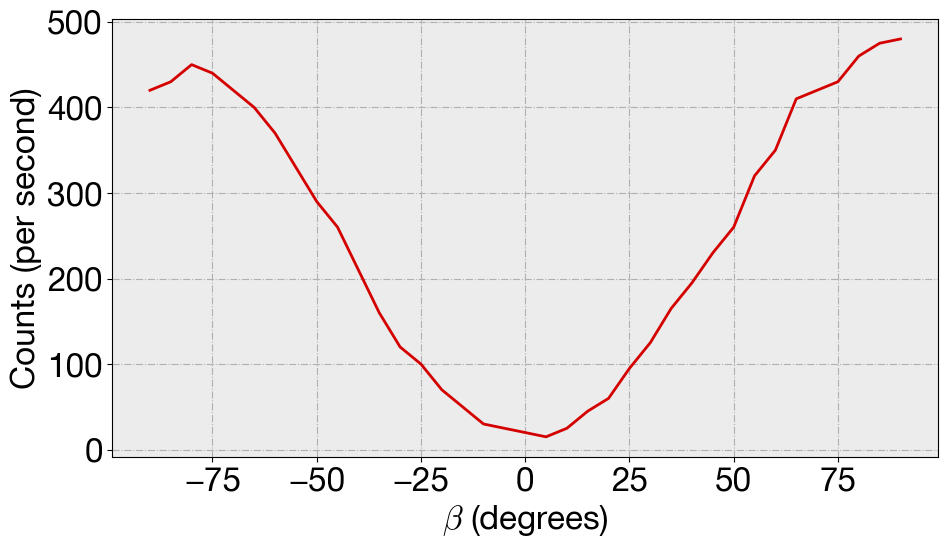

In [7]:
# Figure size
plt.figure(figsize = (10, 6))

# Figure title and legends
# plt.title(r'Coincidence counts against polarization ($\alpha = 90^{\circ}$) with a HWP', wrap = True)
plt.xlabel(r'$\beta$ (degrees)')
plt.ylabel(r'Counts (per second)')

# Plot
plt.plot(alpha_180, counts_180, color = '#D40000')

# Final figure parameters
plt.tight_layout()
plt.savefig('./coincidence_fixed_180.pdf')

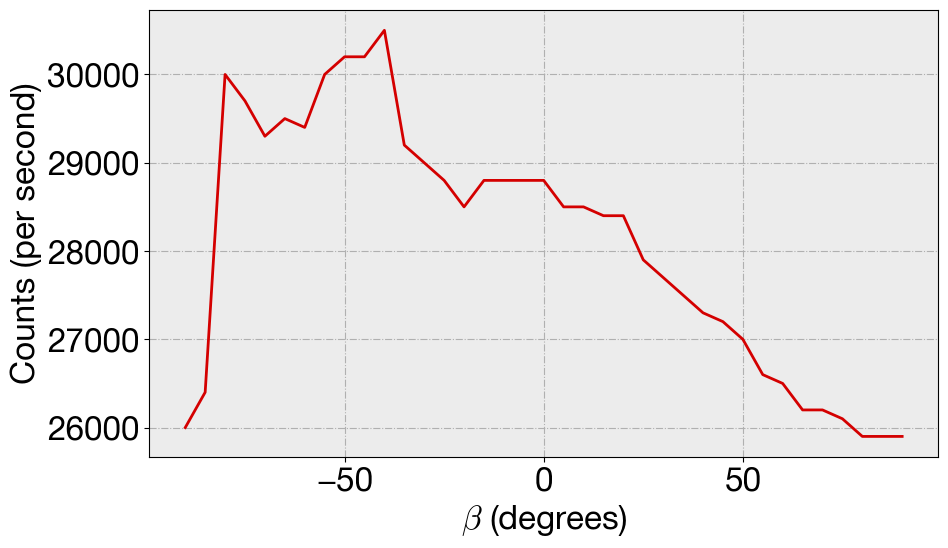

In [8]:
# Figure size
plt.figure(figsize = (10, 6))

# Figure title and legends
# plt.title(r'Detector 1 single counts against polarization ($\alpha = 90^{\circ}$) with a HWP')
# plt.title(r'Coincidence counts against polarization ($\alpha = 90^{\circ}$) with a HWP')
plt.xlabel(r'$\beta$ (degrees)')
plt.ylabel(r'Counts (per second)')

# Plot
plt.plot(alpha_180, single_180, color = '#D40000')

# Final figure parameters
plt.tight_layout()
plt.savefig('./single_fixed_180.pdf')

### $\text{Visibility with} \: 180^{\circ} \: \text{rotation}$

In [9]:
#   5 HORIZONTAL BASIS
# 5.1 Experimental measurements
C_hh_hwp_rot = 1300
C_hv_hwp_rot = 20
C_vh_hwp_rot = 50
C_vv_hwp_rot = 360

# 5.2 Parallel and perpendicular coincidences
C_hv_par_hwp_rot = C_hh_hwp_rot + C_vv_hwp_rot
C_hv_per_hwp_rot = C_hv_hwp_rot + C_vh_hwp_rot

# 5.3 Visibility in the HV basis
vis_hv_hwp_rot = (C_hv_par_hwp_rot - C_hv_per_hwp_rot) / (C_hv_par_hwp_rot + C_hv_per_hwp_rot)

# 5.4 Delta C in the HV basis
Delta_Chv_par_hwp_rot = C_hv_par_hwp_rot ** (1 / 2)
Delta_Chv_per_hwp_rot = C_hv_per_hwp_rot ** (1 / 2)

# 5.5 Partial derivatives in the HV basis
Partial_Chv_par_hwp_rot =  (2 * C_hv_per_hwp_rot) / (C_hv_par_hwp_rot + C_hv_per_hwp_rot) ** 2
Partial_Chv_per_hwp_rot = -(2 * C_hv_par_hwp_rot) / (C_hv_par_hwp_rot + C_hv_per_hwp_rot) ** 2

# 5.6 Visibility error in the HV basis
Vhv_hwp_rot_error = ((Partial_Chv_par_hwp_rot * Delta_Chv_par_hwp_rot) ** 2 
                  +  (Partial_Chv_per_hwp_rot * Delta_Chv_per_hwp_rot) ** 2) ** (1 / 2)

# ===========================================================================================

#   6 DIAGONAL BASIS
# 6.1 Experimental measurements
C_dd_hwp_rot = 730
C_da_hwp_rot = 80
C_ad_hwp_rot = 115
C_aa_hwp_rot = 400

# 6.2 Parallel and perpendicular coincidences
C_da_par_hwp_rot = C_dd_hwp_rot + C_aa_hwp_rot
C_da_per_hwp_rot = C_da_hwp_rot + C_ad_hwp_rot

# 6.3 Visibility
vis_da_hwp_rot = (C_da_par_hwp_rot - C_da_per_hwp_rot) / (C_da_par_hwp_rot + C_da_per_hwp_rot)

# 6.4 Delta C in the HV basis
Delta_Cda_par_hwp_rot = C_da_par_hwp_rot ** (1 / 2)
Delta_Cda_per_hwp_rot = C_da_per_hwp_rot ** (1 / 2)

# 6.5 Partial derivatives in the HV basis
Partial_Cda_par_hwp_rot =  (2 * C_da_per_hwp_rot) / (C_da_par_hwp_rot + C_da_per_hwp_rot) ** 2
Partial_Cda_per_hwp_rot = -(2 * C_da_par_hwp_rot) / (C_da_par_hwp_rot + C_da_per_hwp_rot) ** 2

# 6.6 Visibility error in the HV basis
Vda_hwp_rot_error = ((Partial_Cda_par_hwp_rot * Delta_Cda_par_hwp_rot) ** 2 
                  +  (Partial_Cda_per_hwp_rot * Delta_Cda_per_hwp_rot) ** 2) ** (1 / 2)

# Results
print(f"Visibility in the HV basis with rotated HWP: {vis_hv_hwp_rot * 100:.2f} ± {Vhv_hwp_rot_error * 100:.2f}%")
print(f"Visibility in the DA basis with rotated HWP: {vis_da_hwp_rot * 100:.2f} ± {Vda_hwp_rot_error * 100:.2f}%")

Visibility in the HV basis with rotated HWP: 91.91 ± 0.95%
Visibility in the DA basis with rotated HWP: 70.57 ± 1.95%


### $\text{Final plot}$

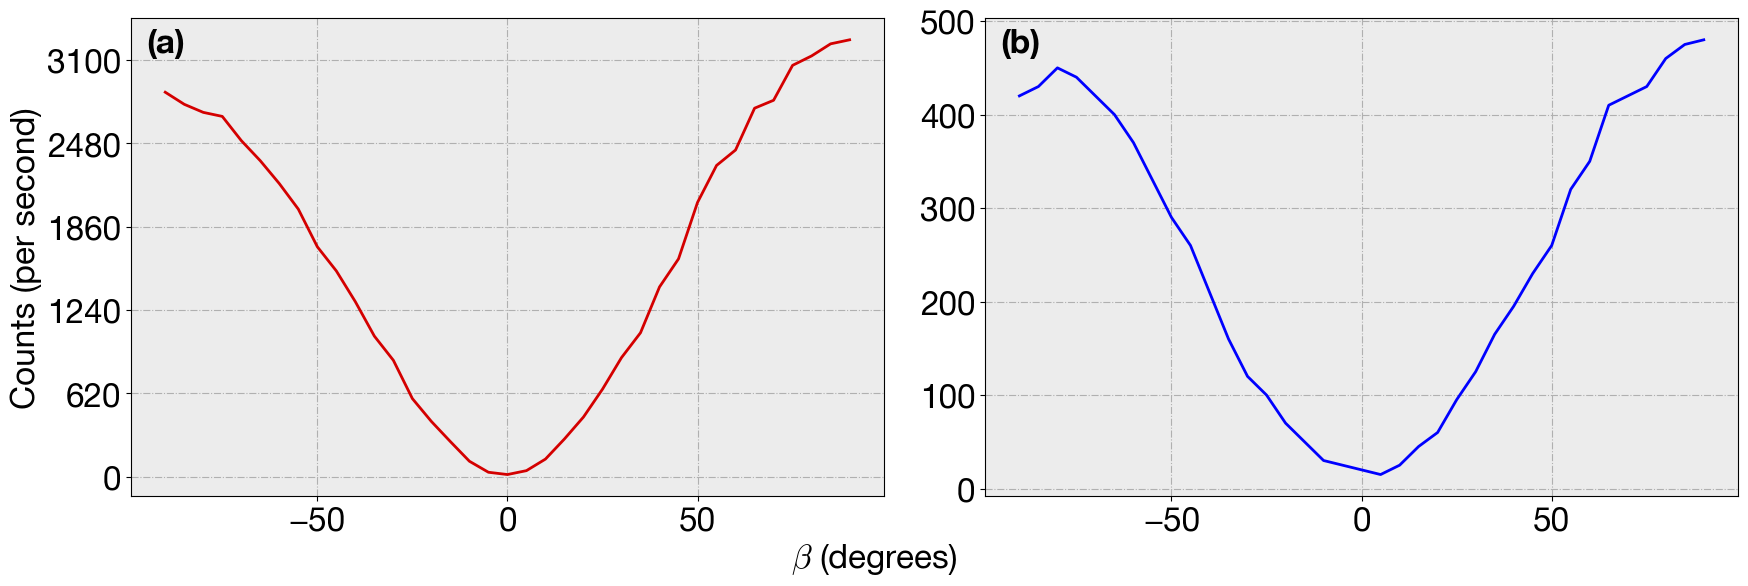

In [ ]:
# Plot
plt.figure(figsize = (18, 6))

common_yticks = np.linspace(0, 3100, 6)

plt.subplot(1, 2, 1)
plt.ylabel(r'Counts (per second)')
plt.plot(alpha_nhwp, counts_nhwp, color = '#D40000')
plt.yticks(common_yticks)
plt.text(0.02, 0.98, '(a)', transform = plt.gca().transAxes, fontweight = 'bold', va = 'top')

plt.subplot(1, 2, 2)
plt.plot(alpha_180, counts_180, color = '#0000FF')
plt.text(0.02, 0.98, '(b)', transform = plt.gca().transAxes, fontweight = 'bold', va = 'top')

plt.tight_layout()
plt.figtext(0.5, 0.01, r'$\beta$ (degrees)', ha = 'center')
plt.savefig('./full_results.pdf')